In [1]:
import torch
import torch.nn as nn #neural network module from pytorch library
import torch.nn.functional as F

In [2]:
#1 create a model class
#create the model class and inherit from the module of neural network
class Model(nn.Module):
    #there will be 2 methods in here
    #Method 1: instantiation method
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        #how many layers?. For each layer we create attribute
        #Input Layer (4 features) --> h1 N -->h2 N--> output (3 classes--3 flowers)
        #h1 n h2 is arbritrary choise of num
        #instantiate the class inheritance
        super().__init__()
        #create layers
        #fc1 for fully connected (fully connect input features to h1)
        self.fc1 = nn.Linear(in_features,h1)
        #note that input of this layer is the output of prev layer
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
        pass
    
    #Method 2: Propagation method (forward propagation)
    def forward(self,x):
        #F is module from nn func, relu is activation fn
        #pass in the fully connected layer into relu
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        #generally here we take those initial features x
        #pass them to the fully connected layer
        #and then pass to the activation fn
        #the result is the passed into the next layer
        
        return x
        
    

In [3]:
# Instantiate the Model class using parameter defaults
torch.manual_seed(32)#random num 32
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
#read dataset
df = pd.read_csv("C:\\Users\\A221LPEN\\Desktop\\Pytorch_for_Deep_Learning\\PYTORCH_NOTEBOOKS\\myCodes\\iris.csv")


In [6]:
#check the head
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


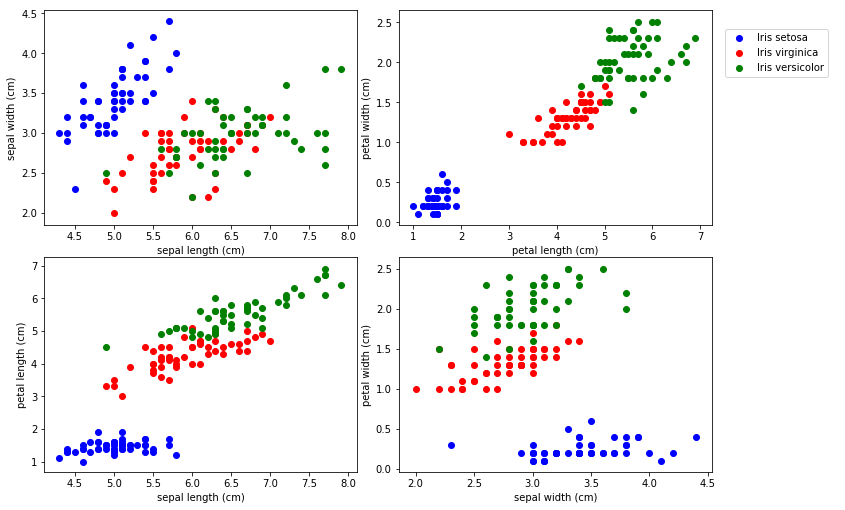

In [8]:
#this is just about plotting the dataset nicely
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [9]:
#3 classes of iris, plotted with 4x4
#iris setose (blue) should be the easiest to classify, since it is more seperated


In [10]:
#Perform train/test/split
#target is a column, so the axis = 1
X = df.drop('target',axis=1)
y = df['target']

In [12]:
#X is still appendices dataframe
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
#y is pandas series
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
120    2.0
121    2.0
122    2.0
123    2.0
124    2.0
125    2.0
126    2.0
127    2.0
128    2.0
129    2.0
130    2.0
131    2.0
132    2.0
133    2.0
134    2.0
135    2.0
136    2.0
137    2.0
138    2.0
139    2.0
140    2.0
141    2.0
142    2.0
143    2.0
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [14]:
#convert them to numpy array
X = X.values
y = y.values

In [17]:
#perform train/test/split
from sklearn.model_selection import train_test_split

In [18]:
#pass in x and y in the train_test_split
#choose test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [19]:
#convert these into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [20]:
#when working with multi class classification,we actually want to hard encode the label/target value
#However, not needed with Cross Entropy Loss
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
#this is how we going to measure error
#criteria we are using to measure how far off the prediction from data
#we'll be 1st training X_train with the predicted value compared to y_train
#later on X_test and y_test will be used to evaluate data that model nvr see before
criterion = nn.CrossEntropyLoss()
#we use Cross Entropy coz of multi class classification problem
#next, choose optimizer (Adam) with learning rate 0.01
#lower learning rate, longer it takes to train data/network
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [22]:
model.parameters()

<generator object Module.parameters at 0x000001E242C7F7C8>

In [23]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [24]:
#Train Model
#How many EPOCH required?--start small,plot loss fn & decide
#An Epoch, 1 run through all training data

epochs = 100
losses = [] #empty list to append loss,easier to track losses

for i in range(epochs):
    #run forward through network and get a prediction
    y_pred = model.forward(X_train)
    
    #calculate loss/error
    loss = criterion(y_pred,y_train)
    
    #keep track of the loss
    losses.append(loss)
    
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
        
    #Perform Backpropagation
    optimizer.zero_grad() #finding the gradient when its zero(finding min) 
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1507115364074707
Epoch 10 and loss is: 0.9377316832542419
Epoch 20 and loss is: 0.7798274159431458
Epoch 30 and loss is: 0.6099672317504883
Epoch 40 and loss is: 0.4008353650569916
Epoch 50 and loss is: 0.25436991453170776
Epoch 60 and loss is: 0.15052446722984314
Epoch 70 and loss is: 0.10086154192686081
Epoch 80 and loss is: 0.08127661049365997
Epoch 90 and loss is: 0.07230935245752335


Text(0.5, 0, 'Epoch')

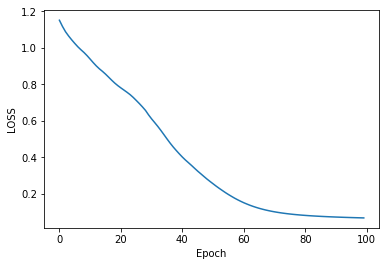

In [25]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [ ]:
#this is the expected behaviour when training model--error decrease
#when its start converging on training set,we had trained for enough epoch